In [98]:
from astropy.io import fits
import numpy as np
from numpy import fft
import pandas as pd
import open3d as o3d
import matplotlib.pyplot as plt
from astropy import units as u
from spectral_cube import SpectralCube

In [99]:
fits_path = "/home/tmassagl/development/pynbody/.data/other_data/reduced_TAN_C14.fits"
hdul = fits.open(fits_path)

In [100]:
hdul[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    3 / number of array dimensions                     
NAXIS1  =                  150                                                  
NAXIS2  =                  150                                                  
NAXIS3  =                  450                                                  
OBJECT  = 'HI4PI   '           / The HI 4-PI Survey                             
TELESCOP= 'Effelsberg 100m RT; ATNF Parkes 64-m' / Telescope names              
ORIGIN  = 'AIfA/MPIfR Bonn; ATNF Sydney' / Organisations or Institutions        
REFERENC= 'HI4PI Collaboration 2016' / A&A                                      
RESTFRQ =        1420405751.77                                                  
RESTWAV =       0.211061140541                                                  
WCSAXES =                   

In [101]:
# velocity_kms = hdul[0].data[3]
# velocity_ms = (velocity_kms * u.km / u.s).to(u.m / u.s).value  
# hdul[0].data[3] = velocity_ms
# 
# hdul[0].header['CUNIT3'] = "m/s"
# 
# hdul.writeto('.data/other_data/ngc2403_fixed.fits', overwrite=True)

In [102]:
cube = SpectralCube.read(fits_path)
moment = cube[:].moment(order=1)

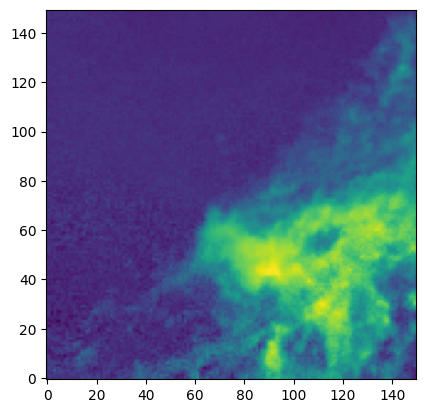

In [103]:
plt.imshow(moment.hdu.data, origin="lower")

In [104]:
# Extract a 3D point cloud from a FITS file containing hyperspectral data.
# 
# Parameters:
# - fits_path (str): Path to the FITS file.
# - intensity_threshold (float): Minimum intensity value to consider a point.
# - spatial_scale (float): Conversion factor from pixels to physical spatial units.
# - velocity_scale (float): Conversion factor from channels to velocity units.
# - velocity_offset (float): Velocity value corresponding to channel 0.
# 
# Returns:
# - np.ndarray: Nx3 array representing the 3D point cloud (x, y, v).

intensity_threshold=0.09
spatial_scale=2, 
velocity_scale=1.0, 
velocity_offset=0
spectral_range=(240,420)

# Load data from FITS file
hdul = fits.open(fits_path)
data_cube = hdul[0].data[spectral_range[0]:spectral_range[1],:,:].copy()
header = hdul[0].header.copy()


# Assuming data_cube is (velocity, y, x)
indices = np.argwhere(data_cube > intensity_threshold)

# Extract positions and velocities
x_coords = indices[:, 2] * spatial_scale
y_coords = indices[:, 1] * spatial_scale
velocities = indices[:, 0] * velocity_scale + velocity_offset
intensities = data_cube[indices[:, 0], indices[:, 1], indices[:, 2]]

# Combine into point cloud
pc = np.column_stack((x_coords, y_coords, velocities, intensities))

In [105]:
df = pd.DataFrame(pc)
df.columns = ["x", "y", "z", "intensity"]

In [106]:
df.head()

,x,y,z,intensity
0,136.0,0.0,0.0,0.096868
1,202.0,0.0,0.0,0.131355
2,204.0,0.0,0.0,0.158044
3,206.0,0.0,0.0,0.148012
4,208.0,0.0,0.0,0.200695


In [107]:
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(df.iloc[:,:3].values.tolist())

In [108]:
intensity = df['intensity'].values
volume_normalized = (intensity - intensity.min()) / (intensity.max() - intensity.min())
colors = plt.cm.plasma(intensity)[:, :3]  # Use a colormap (e.g., viridis)
pcd.colors = o3d.utility.Vector3dVector(colors)

In [109]:
o3d.visualization.draw_geometries([pcd])

MESA: error: ZINK: failed to choose pdev
glx: failed to create drisw screen
